# Import Libraries

In [8]:
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
import numpy as np
from stock_prices_predictions.get_data import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras import layers
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import mean_absolute_percentage_error

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Fetch data

define company:

In [77]:
company = "NVDA"
days_ahead = 1

In [78]:
X_train, X_test = get_lstm_data(company)

In [79]:
X_train.shape

(3773, 1)

In [80]:
X_test.shape

(919, 1)

# Scale data

In [81]:
#try differente scalers
scaler = RobustScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)

X_test_sc = scaler.transform(X_test)

In [82]:
X_train.shape

(3773, 1)

# Create Sequences

In [ ]:
X_train, y_train = create_sequences(pd.DataFrame(X_train_sc),pd.DataFrame(X_train), days_ahead)
X_test, y_test = create_sequences(pd.DataFrame(X_test_sc),pd.DataFrame(X_test), days_ahead)

In [ ]:
X_train, y_train = create_sequences_scaled(pd.DataFrame(X_train_sc), days_ahead)
X_test, y_test = create_sequences_scaled(pd.DataFrame(X_test_sc), days_ahead)

In [83]:
X_train, y_train, y_train_simple = create_sequences_scaled_plus(pd.DataFrame(X_train_sc),pd.DataFrame(X_train), days_ahead)
X_test, y_test, y_test_simple = create_sequences_scaled_plus(pd.DataFrame(X_test_sc), pd.DataFrame(X_test), days_ahead)

In [84]:
X_train.shape

(409, 19, 1)

In [85]:
X_test.shape

(91, 19, 1)

In [86]:
y_test_simple.shape

(91,)

# Create model

In [88]:
model = Sequential()
#model.add(LSTM(units=72, activation='relu', input_shape= (36, 4), return_sequences=True))
model.add(LSTM(units=72, activation='tanh', input_shape= (19, 1)))
model.add(Dense(units=36, activation="tanh"))
model.add(Dense(units=10, activation="tanh"))
model.add(Dense(units=1, activation="linear"))

# Fit model


In [89]:
es = EarlyStopping(patience=20, restore_best_weights=True)

#try different losses: mae, mape, mse

#rmsprop optimizer
model.compile(optimizer="adam", loss="mae", metrics=["mae", "mape"])
#validation_split=0.2,
history_LSTM = model.fit(X_train, y_train, epochs=200, batch_size=16, workers=-1, validation_split=0.2, callbacks=[es])

Epoch 1/200
21/21 [==============================] - 2s 25ms/step - loss: 0.2132 - mae: 0.2132 - mape: 412222.6250 - val_loss: 0.0388 - val_mae: 0.0388 - val_mape: 47.7929
Epoch 2/200
21/21 [==============================] - 0s 9ms/step - loss: 0.1004 - mae: 0.1004 - mape: 35772.7383 - val_loss: 0.0370 - val_mae: 0.0370 - val_mape: 47.7756
Epoch 3/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0833 - mae: 0.0833 - mape: 50751.2891 - val_loss: 0.0429 - val_mae: 0.0429 - val_mape: 40.8552
Epoch 4/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0698 - mae: 0.0698 - mape: 80475.5625 - val_loss: 0.0817 - val_mae: 0.0817 - val_mape: 64.9787
Epoch 5/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0766 - mae: 0.0766 - mape: 143572.0625 - val_loss: 0.0451 - val_mae: 0.0451 - val_mape: 54.1278
Epoch 6/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0692 - mae: 0.0692 - mape: 4900.3809 - val_loss: 0.0339 - val_mae: 0.033

Epoch 49/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0479 - mae: 0.0479 - mape: 220228.6406 - val_loss: 0.0247 - val_mae: 0.0247 - val_mape: 24.4539
Epoch 50/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0498 - mae: 0.0498 - mape: 99598.3672 - val_loss: 0.0346 - val_mae: 0.0346 - val_mape: 48.8286
Epoch 51/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0430 - mae: 0.0430 - mape: 211404.3125 - val_loss: 0.0341 - val_mae: 0.0341 - val_mape: 37.4324
Epoch 52/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0544 - mae: 0.0544 - mape: 148165.2969 - val_loss: 0.0557 - val_mae: 0.0557 - val_mape: 69.9043
Epoch 53/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0457 - mae: 0.0457 - mape: 204698.9531 - val_loss: 0.0228 - val_mae: 0.0228 - val_mape: 32.5643
Epoch 54/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0451 - mae: 0.0451 - mape: 206247.9531 - val_loss: 0.0205 - val_m

21/21 [==============================] - 0s 9ms/step - loss: 0.0427 - mae: 0.0427 - mape: 221426.2031 - val_loss: 0.0254 - val_mae: 0.0254 - val_mape: 41.6786
Epoch 97/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0450 - mae: 0.0450 - mape: 196037.2031 - val_loss: 0.0196 - val_mae: 0.0196 - val_mape: 25.9420
Epoch 98/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0428 - mae: 0.0428 - mape: 207678.2188 - val_loss: 0.0232 - val_mae: 0.0232 - val_mape: 24.3488
Epoch 99/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0429 - mae: 0.0429 - mape: 176535.0469 - val_loss: 0.0284 - val_mae: 0.0284 - val_mape: 26.0453
Epoch 100/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0439 - mae: 0.0439 - mape: 250851.6719 - val_loss: 0.0208 - val_mae: 0.0208 - val_mape: 29.8202
Epoch 101/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0425 - mae: 0.0425 - mape: 260476.6719 - val_loss: 0.0319 - val_mae: 0.0319

In [62]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 8ms/step - loss: 0.3555 - mae: 0.3555 - mape: 16.4730


[0.3555030822753906, 0.3555030822753906, 16.47296142578125]

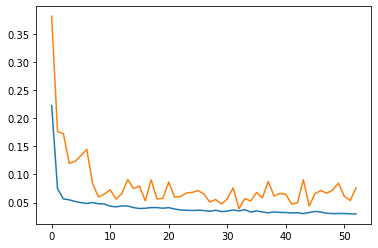

In [66]:
plt.plot(history_LSTM.history["mae"])
plt.plot(history_LSTM.history["val_mae"])

# Test Model

In [ ]:
model.summary()

In [ ]:
X_test

In [67]:
prediction = model.predict(X_test)

In [68]:
prediction

array([[1.1493303],
       [1.3057617],
       [1.2502916],
       [1.1794459],
       [1.189925 ],
       [1.1735655],
       [1.1770421],
       [1.3482018],
       [1.2582622],
       [1.3558935],
       [1.3391029],
       [1.3666812],
       [1.4160562],
       [1.4039601],
       [1.3710496],
       [1.3526108],
       [1.1992075],
       [1.2323923],
       [1.2104838],
       [1.200444 ],
       [1.3116953],
       [1.3178608],
       [1.2748039],
       [1.3311644],
       [1.3565304],
       [1.3548331],
       [1.4060681],
       [1.402896 ],
       [1.5365117],
       [1.5912384],
       [1.633206 ],
       [1.6993196],
       [1.7452155],
       [1.7744163],
       [1.757519 ],
       [1.7652572],
       [1.8075109],
       [1.7545618],
       [1.8281848],
       [1.8984901],
       [2.0257847],
       [2.0275764],
       [2.032083 ],
       [2.0494072],
       [1.9252231],
       [1.9417037],
       [1.8792689],
       [1.9220093],
       [1.8588665],
       [1.6827998],


# Visualizing Model

In [ ]:
y_test.reshape(-1, 1).shape

In [69]:
y_test_back = scaler.inverse_transform(y_test.reshape(-1, 1))
prediction_back = scaler.inverse_transform(prediction.reshape(-1, 1))

In [53]:
y_test

array([1.19491688, 1.36850923, 1.35721001, 1.16410169, 1.21032459,
       1.21956921, 1.23415579, 1.39982472, 1.36960862, 1.43941857,
       1.43108258, 1.55507365, 1.54048708, 1.49825436, 1.4813608 ,
       1.38317037, 1.26491899, 1.27442188, 1.22057499, 1.34304941,
       1.43640124, 1.40641542, 1.33894704, 1.38928006, 1.43854287,
       1.46424496, 1.51779149, 1.56123133, 1.74259234, 1.77408565,
       1.84576202, 1.97390862, 1.99888697, 2.06177997, 2.09256481,
       2.11235573, 2.11785269, 2.0837692 , 2.2212016 , 2.3542369 ,
       2.6051964 , 2.56850862, 2.61409126, 2.62520843, 2.37950691,
       2.39284826, 2.32391873, 2.24943013, 2.23254975, 1.92196485,
       1.92871738, 2.1717845 , 2.36533713, 2.59264913, 2.62640896,
       2.458084  , 2.61290437, 2.44100838, 2.57419987, 2.63453326,
       2.55484738, 2.53890926, 2.4502062 , 2.30044905, 2.25897748,
       2.20483351, 2.28201672, 2.20252935, 2.15231911, 2.02978565,
       2.35070728, 2.30636139, 2.24684513, 1.96676893, 2.27368

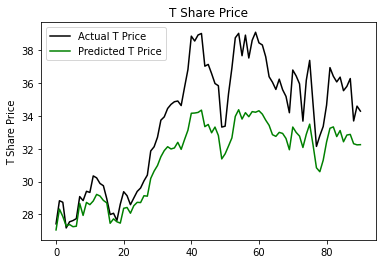

In [70]:
plt.plot(y_test_back, color="black", label=f"Actual {company} Price")
plt.plot(prediction_back,color="green", label=f"Predicted {company} Price")
plt.xlabel("")
plt.ylabel(f"{company} Share Price")
plt.title(f"{company} Share Price")
plt.legend()
plt.show()

In [71]:
mape = mean_absolute_percentage_error(y_test_back, prediction_back)
np.mean(mape)

6.6192527

In [ ]:
y_train.mean()

In [ ]:
y_test_back

In [35]:
mape2 = mean_absolute_percentage_error(y_test_back, y_test_simple)
np.mean(mape2)

12.386865683560508

In [36]:
y_test_simple

array([27.45345116, 28.736166  , 27.17025375, 27.76367378, 29.03948402,
       29.29294968, 30.06824493, 29.77714729, 27.87648201, 27.9449749 ,
       29.13517189, 29.04833031, 30.20331383, 30.94536591, 32.20467377,
       34.45027924, 34.25337219, 34.93095398, 35.53720856, 38.85606766,
       38.91016388, 36.96284866, 37.08906937, 34.21001434, 34.13702011,
       37.8691864 , 37.81082916, 38.19853973, 39.09395981, 37.92620468,
       35.50677872, 36.3101387 , 35.44138718, 35.98805618, 35.94074249,
       36.15839005, 34.65774536, 32.78927994, 35.19433594, 36.65078735,
       35.56339645, 35.63136292, 34.07794952, 32.53449249])

In [76]:
X_train[1]

array([[-0.05636086],
       [-0.10073944],
       [-0.12926859],
       [-0.10707917],
       [-0.00564303],
       [-0.05636086],
       [-0.15779842],
       [-0.15779842],
       [-0.20851626],
       [-0.19583562],
       [-0.01198205],
       [-0.03734097],
       [-0.03100124],
       [-0.05636086],
       [-0.05636086],
       [-0.06270036],
       [-0.05318994],
       [-0.02466104],
       [-0.05002113]], dtype=float32)

In [73]:
y_train[0]

-0.011982049388878042